# Training

**Paper:** Automatic identification of Hainan Gibbon calls in passive acoustic recordings

**Authors:** Emmanuel Dufourq, Ian Durbach, James Hansford, Sam Turvey, Amanda Hoepfner

**Year:** March 2020

**Repository:** https://github.com/emmanueldufourq/GibbonClassifier

Train a CNN on the augmented spectrogram images. The model is defined in file 'CNN_Network.py'.

The network takes image input of shape (128,188,1). Since there are usually a number of audio files used for training, these can be listed in the text file 'Training_Files.txt. Here a list of audio file names is provided (without extension). Each audio file listed in the training text file must first be processed using 'Extract_Audio' and 'Augmentation_Execution' notebooks so that the pickled spectrogram data is available.

The corresponding calls and non-call data are read from the 'Augmented_Image_Data' folder one at a time and a message is displayed to the screen once read. The script creates the training features and targets for the CNN and beings training for a number of iterations 'number_iterations = 10'. On each iteration, the training data is used to a build a new model. Thus 'number_iterations' can be set to 1 to create 1 model, or X ot create X models. Each model will perform differently given that the weights in the CNN are randomly initially on each execution. The data is split into training and valdation.

For each model which is trained, a unique ID is created (eg: 331841) and the weights of the best model are saved in the '/Experiments/' folder. The training and validation accuracy is displayed along with a confusion matrix on the validation data. The model's history is also saved for advanced Keras users. Another file is created which has stores the training and validation accuracy along with the time taken for the execution. The ID numbers can be used to match all the output files.

In this example there are 7380 spectrograms (3690 gibbon and 3690 non-gibbon calls). The shape of X is (7380, 128, 188, 1) and Y is (7380, 2). The value of 2 is due to the fact that there are 2 classes and the labels have been encoded used 2 values [0,1] or [1,0] for gibbon and non-gibbon calls. This allows  the model to produce a probabilistic distribution over the two classes.

The values of the batch size, number of epochs and class balance can be specified in 'Hyper_Parameters.py'. Primarily, the batch size and class balance should be unchanged. Changing the number of epochs will impact the training performance. Training too few epochs could result in a model which has not seen the data enough time to learn enough. The default value is set to 50 epochs.


In [1]:
from Train_Helper import *

Using TensorFlow backend.
/home/emmanuel/anaconda3/envs/gibbons-python/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Directories

In [2]:
training_file = '../Training_Files.txt'
training_folder = '../Augmented_Image_Data/'

## Number of random training executions

In [3]:
number_iterations = 1

## Load and create the training features

In [4]:
training_files = []
gibbon_X, noise_X = load_training_images(training_folder, training_file)


-----
Reading file: HGSM3D_0+1_20160429_051600
okay gibbon augmented HGSM3D_0+1_20160429_051600
okay non-gibbon augmented HGSM3D_0+1_20160429_051600
----------------------------------
Gibbon features: (3690, 128, 188, 1)
Non-gibbon features (3690, 128, 188, 1)


## Create the features and targets

In [5]:
X, Y = prepare_X_and_Y(gibbon_X, noise_X)
del gibbon_X, noise_X

## Check shapes of X and Y

In [6]:
print ('Shape of X', X.shape)
print ('Shape of Y', Y.shape)

Shape of X (7380, 128, 188, 1)
Shape of Y (7380, 2)


## Begin training

Iteration 0 starting...
experiment_id: 0
X_train: (5904, 128, 188, 1)
Y_train: (5904, 2)

X_val: (1476, 128, 188, 1)
Y_val: (1476, 2)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 188, 8)       136       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 188, 8)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 47, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 47, 16)        2064      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 47, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 11, 16)         0         
________

 - 4s - loss: 0.0052 - acc: 0.9981 - val_loss: 0.0200 - val_acc: 0.9932

Epoch 00042: val_acc did not improve from 0.99864
Epoch 43/50
 - 4s - loss: 0.0257 - acc: 0.9947 - val_loss: 0.0356 - val_acc: 0.9864

Epoch 00043: val_acc did not improve from 0.99864
Epoch 44/50
 - 4s - loss: 0.0363 - acc: 0.9905 - val_loss: 0.0479 - val_acc: 0.9851

Epoch 00044: val_acc did not improve from 0.99864
Epoch 45/50
 - 4s - loss: 0.0160 - acc: 0.9963 - val_loss: 0.0330 - val_acc: 0.9912

Epoch 00045: val_acc did not improve from 0.99864
Epoch 46/50
 - 4s - loss: 0.0227 - acc: 0.9934 - val_loss: 0.0269 - val_acc: 0.9939

Epoch 00046: val_acc did not improve from 0.99864
Epoch 47/50
 - 4s - loss: 0.0151 - acc: 0.9959 - val_loss: 0.0509 - val_acc: 0.9817

Epoch 00047: val_acc did not improve from 0.99864
Epoch 48/50
 - 4s - loss: 0.0154 - acc: 0.9949 - val_loss: 0.0419 - val_acc: 0.9844

Epoch 00048: val_acc did not improve from 0.99864
Epoch 49/50
 - 4s - loss: 0.0224 - acc: 0.9954 - val_loss: 0.0162 -

<Figure size 432x288 with 0 Axes>

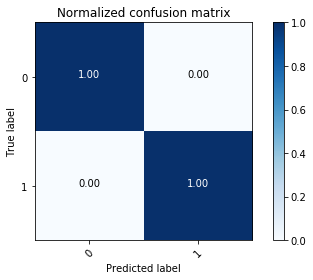

Iteration 0 ended...
Results saved to:
../Experiments/train_test_performance_331841.txt
-------------------


In [7]:
train_model(number_iterations, X, Y)